In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import sys
from pprint import pprint
import pandas as pd
import os
import json
import numpy as np
import pandas
from tslearn.piecewise import PiecewiseAggregateApproximation

/home/bruna/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
hits = pd.read_csv(r"dataset/spotify_hits_dataset_complete.csv", error_bad_lines=False, sep='\t', encoding='utf-8')
hits.head()

/home/bruna/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,7offICpl9kla5kC61uUAs9,Bate Palma,"['5GqnSMX8p2hxqsM6LqDty3', '0jTDeBJQr3unrK29Lk...","['MC JottaPê', 'Lexa']",50,False,Collaboration,1,2,181,...,4,0.626,0.857,0.685,0.0,0.206,-4.840,0.3800,0.8370,150.052
1,1dLXLETYiZohIZWnse4ypG,Better,['5ZsFI1h6hIdQRw2ti0hz81'],['ZAYN'],68,False,Solo,1,1,183,...,4,0.353,0.637,0.418,0.0,0.131,-7.137,0.3010,0.0807,84.295
2,79Uf0vVa7HwWKSgdpTwtRm,Século 21,"['7KVJCU4z5L4EUHILL8aMxR', '4PzYKhC14sTJNEr0dz...","['Leo Santana', 'Luísa Sonza']",50,True,Collaboration,5,2,184,...,4,0.456,0.832,0.769,0.0,0.407,-7.023,0.0578,0.7240,132.972
3,3U4isOIWM3VvDubwSI3y7a,All of Me,['5y2Xq6xcjJb2jVM54GHK3t'],['John Legend'],88,False,Solo,6,1,184,...,4,0.922,0.422,0.264,0.0,0.132,-7.064,0.0322,0.3310,119.930
4,78kar2tZk7655xZMibzXO3,Oi,['5D56dZmhE9DgT01XixdHiD'],['Lagum'],63,False,Solo,4,1,184,...,4,0.296,0.807,0.560,0.0,0.101,-9.356,0.0459,0.7250,134.093


In [4]:
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join('primeiro_2020', x)),
                        os.listdir('primeiro_2020') ))

In [5]:
danceability_medias = []
valence_medias = []
energy_medias = []
tempo_medias = []
dates = []
danceability_median = []
valence_median = []
energy_median = []
tempo_median = []

In [6]:
directory = 'primeiro_2020'
for filename in list_of_files:
    if filename.endswith(".csv"):
        danceability_week = []
        valence_week = []
        energy_week = []
        tempo_week = []
        path = directory + '/' + filename
        chart = pd.read_csv(path, encoding='utf-8', delimiter='\t')
        for i in chart['ID']:
            for idx, song_id in enumerate(hits['song_id']):
                if i == song_id:
                    danceability_week.append(hits.loc[idx, 'danceability'])
                    valence_week.append(hits.loc[idx, 'valence'])
                    energy_week.append(hits.loc[idx, 'energy'])
                    tempo_week.append(hits.loc[idx, 'tempo'])
                    ates = pd.to_datetime(dates)
        dates.append(filename[18:28])
        
        danceability_medias.append(np.mean(danceability_week))
        valence_medias.append(np.mean(valence_week))
        energy_medias.append(np.mean(energy_week))
        tempo_medias.append(np.mean(tempo_week))
        
        danceability_median.append(np.median(danceability_week))
        valence_median.append(np.median(valence_week))
        energy_median.append(np.median(energy_week))
        tempo_median.append(np.median(tempo_week))

In [7]:
dates = pd.to_datetime(dates)

In [8]:
df = pd.DataFrame(list(zip(dates, danceability_medias, danceability_median, valence_medias, valence_median, energy_medias, energy_median, tempo_medias, tempo_median)), 
                     columns=['Data', 'DanceabilityMedia', 'DanceabilityMedian','ValenceMedia', 'ValenceMedian', 'EnergyMedia', 'EnergyMedian', 'TempoMedia', 'TempoMedian'])
df.head(20)

,Data,DanceabilityMedia,DanceabilityMedian,ValenceMedia,ValenceMedian,EnergyMedia,EnergyMedian,TempoMedia,TempoMedian
0,2020-02-01,0.681030,0.6920,0.652171,0.6685,0.714864,0.7440,131.217702,131.5130
1,2020-02-02,0.682643,0.6930,0.656513,0.6730,0.718910,0.7530,132.018060,131.8130
2,2020-02-03,0.673960,0.6870,0.636334,0.6670,0.695462,0.7190,128.191261,127.0850
3,2020-02-04,0.674520,0.6840,0.632988,0.6665,0.694170,0.7160,128.379640,127.5260
4,2020-02-05,0.675735,0.6840,0.634168,0.6665,0.698720,0.7195,128.332410,127.0315
5,2020-02-06,0.675750,0.6870,0.638423,0.6670,0.701495,0.7205,128.720835,128.0865
6,2020-02-07,0.680305,0.6940,0.646755,0.6735,0.706275,0.7255,129.661220,130.0145
7,2020-02-08,0.689422,0.7020,0.658623,0.6750,0.713563,0.7340,131.408457,131.6330
8,2020-02-09,0.684890,0.6935,0.656495,0.6740,0.713735,0.7385,131.412870,131.7230
9,2020-02-10,0.679201,0.6930,0.633920,0.6660,0.698317,0.7160,128.949317,128.1240


# Danceability

Text(0, 0.5, 'Danceability')

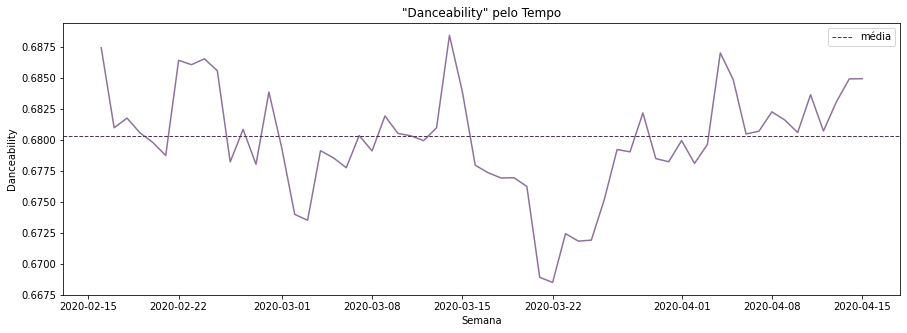

In [15]:
media = np.mean(danceability_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:75], danceability_medias[15:75], color='#8F719B')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#4F335B', linestyle='--', label='média')

plt.title('"Danceability" pelo Tempo')
plt.legend(loc="upper right")
plt.xlabel('Semana')
plt.ylabel('Danceability')

In [42]:
for idx, x in enumerate(dates):
    print(idx, x)

0 2020-02-01 00:00:00
1 2020-02-02 00:00:00
2 2020-02-03 00:00:00
3 2020-02-04 00:00:00
4 2020-02-05 00:00:00
5 2020-02-06 00:00:00
6 2020-02-07 00:00:00
7 2020-02-08 00:00:00
8 2020-02-09 00:00:00
9 2020-02-10 00:00:00
10 2020-02-11 00:00:00
11 2020-02-12 00:00:00
12 2020-02-13 00:00:00
13 2020-02-14 00:00:00
14 2020-02-15 00:00:00
15 2020-02-16 00:00:00
16 2020-02-17 00:00:00
17 2020-02-18 00:00:00
18 2020-02-19 00:00:00
19 2020-02-20 00:00:00
20 2020-02-21 00:00:00
21 2020-02-22 00:00:00
22 2020-02-23 00:00:00
23 2020-02-24 00:00:00
24 2020-02-25 00:00:00
25 2020-02-26 00:00:00
26 2020-02-27 00:00:00
27 2020-02-28 00:00:00
28 2020-02-29 00:00:00
29 2020-03-01 00:00:00
30 2020-03-02 00:00:00
31 2020-03-03 00:00:00
32 2020-03-04 00:00:00
33 2020-03-05 00:00:00
34 2020-03-06 00:00:00
35 2020-03-07 00:00:00
36 2020-03-08 00:00:00
37 2020-03-09 00:00:00
38 2020-03-10 00:00:00
39 2020-03-11 00:00:00
40 2020-03-12 00:00:00
41 2020-03-13 00:00:00
42 2020-03-14 00:00:00
43 2020-03-15 00:00:0

Text(0, 0.5, 'Danceability')

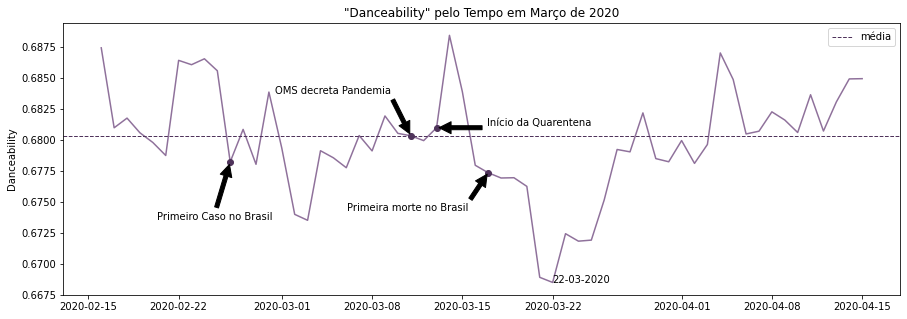

In [60]:
media = np.mean(danceability_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:75], df['DanceabilityMedia'][15:75], color='#8F719B')

style = dict(size=10, color='black')

ax.text(dates[positions_medias[9]], danceability_medias[positions_medias[9]], "22-03-2020", ha='left', **style)

ax.plot(dates[25], danceability_medias[25], 'o', color='#4F335B')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[25], danceability_medias[25]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[39], danceability_medias[39], 'o', color='#4F335B')
ax.annotate('OMS decreta Pandemia',
            xy=(dates[39], danceability_medias[39]), xycoords='data',
            xytext=(-20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[41], danceability_medias[41], 'o', color='#4F335B')
ax.annotate('Início da Quarentena',
            xy=(dates[41], danceability_medias[41]), xycoords='data',
            xytext=(50, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[45], danceability_medias[45], 'o', color='#4F335B')
ax.annotate('Primeira morte no Brasil',
            xy=(dates[45], danceability_medias[45]), xycoords='data',
            xytext=(-20, -30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.axhline(media,linewidth=1, color='#4F335B', linestyle='--', label='média')

plt.title('"Danceability" pelo Tempo em Março de 2020')
plt.legend(loc="upper right")
plt.ylabel('Danceability')

Text(0, 0.5, 'Danceability')

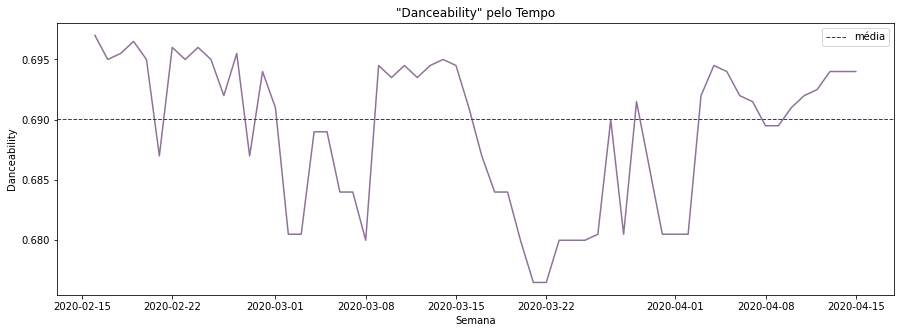

In [19]:
media = np.mean(danceability_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:75], danceability_median[15:75], color='#8F719B')

style = dict(size=10, color='black')
plt.axhline(media,linewidth=1, color='#4F335B', linestyle='--', label='média')

plt.title('"Danceability" pelo Tempo')
plt.legend(loc="upper right")
plt.xlabel('Semana')
plt.ylabel('Danceability')

In [20]:
positions_median = []
for idx, x in enumerate(danceability_median):
    if x < 0.679 or x > 0.7:
        positions_median.append(idx)
positions_median

[7, 49, 50]

In [21]:
datas_median = []
for x in positions_median:
    datas_median.append(dates[x])

print(datas_median)

[Timestamp('2020-02-08 00:00:00'), Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00')]


Text(0, 0.5, 'Danceability')

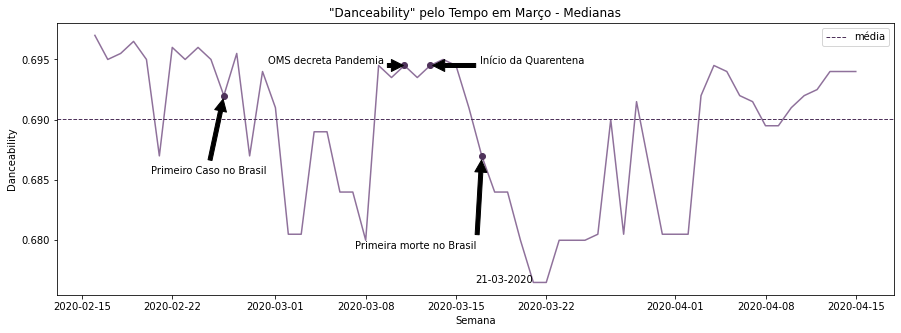

In [72]:
media = np.mean(danceability_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:75], danceability_median[15:75], color='#8F719B')

style = dict(size=10, color='black')

ax.plot(dates[25], danceability_median[25], 'o', color='#4F335B')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[25], danceability_median[25]), xycoords='data',
            xytext=(-15, -70), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[39], danceability_median[39], 'o', color='#4F335B')
ax.annotate('OMS decreta Pandemia',
            xy=(dates[39], danceability_median[39]), xycoords='data',
            xytext=(-20, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[41], danceability_median[41], 'o', color='#4F335B')
ax.annotate('Início da Quarentena',
            xy=(dates[41], danceability_median[41]), xycoords='data',
            xytext=(50, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[45], danceability_median[45], 'o', color='#4F335B')
ax.annotate('Primeira morte no Brasil',
            xy=(dates[45], danceability_median[45]), xycoords='data',
            xytext=(-5, -85), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.axhline(media,linewidth=1, color='#4F335B', linestyle='--', label='média')

ax.text(dates[positions_median[1]], danceability_median[positions_median[1]], "21-03-2020", ha='right', **style)

plt.title('"Danceability" pelo Tempo em Março - Medianas')
plt.legend(loc="upper right")
plt.xlabel('Semana')
plt.ylabel('Danceability')

# Valence

Text(0, 0.5, 'Valence')

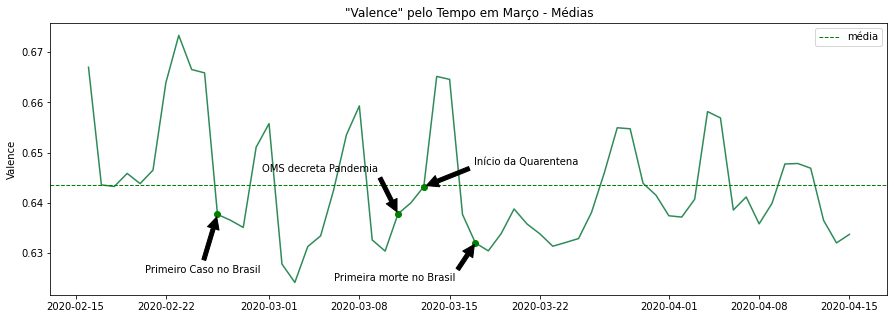

In [83]:
media = np.mean(valence_medias[15:75])

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:75], valence_medias[15:75], color='#2E8B57')
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

ax.plot(dates[25], valence_medias[25], 'o', color='g')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[25], valence_medias[25]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[39], valence_medias[39], 'o', color='g')
ax.annotate('OMS decreta Pandemia',
            xy=(dates[39], valence_medias[39]), xycoords='data',
            xytext=(-20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[41], valence_medias[41], 'o', color='g')
ax.annotate('Início da Quarentena',
            xy=(dates[41], valence_medias[41]), xycoords='data',
            xytext=(50, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[45], valence_medias[45], 'o', color='g')
ax.annotate('Primeira morte no Brasil',
            xy=(dates[45], valence_medias[45]), xycoords='data',
            xytext=(-20, -30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Valence" pelo Tempo em Março - Médias')
plt.legend(loc="upper right")
plt.ylabel('Valence')

Text(0, 0.5, 'Valence')

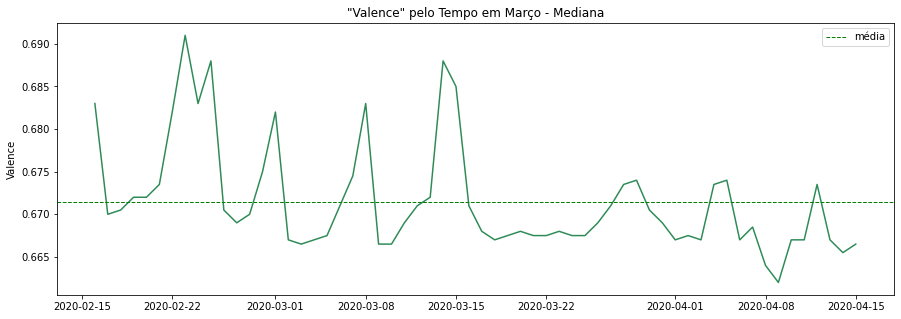

In [78]:
media = np.mean(valence_median[15:75])

plt.figure(figsize=(15,5))
plt.plot(dates[15:75], valence_median[15:75], color='#2E8B57')
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

plt.title('"Valence" pelo Tempo em Março - Mediana')
plt.legend(loc="upper right")
plt.ylabel('Valence')

Text(0, 0.5, 'Valence')

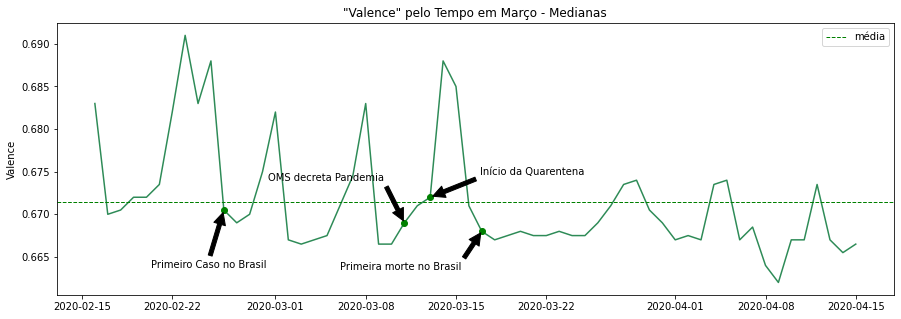

In [85]:
media = np.mean(valence_median[15:75])

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:75], valence_median[15:75], color='#2E8B57')
plt.axhline(media,linewidth=1, color='g', linestyle='--', label='média')

ax.plot(dates[25], valence_median[25], 'o', color='g')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[25], valence_median[25]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[39], valence_median[39], 'o', color='g')
ax.annotate('OMS decreta Pandemia',
            xy=(dates[39], valence_median[39]), xycoords='data',
            xytext=(-20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[41], valence_median[41], 'o', color='g')
ax.annotate('Início da Quarentena',
            xy=(dates[41], valence_median[41]), xycoords='data',
            xytext=(50, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[45], valence_median[45], 'o', color='g')
ax.annotate('Primeira morte no Brasil',
            xy=(dates[45], valence_median[45]), xycoords='data',
            xytext=(-20, -30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Valence" pelo Tempo em Março - Medianas')
plt.legend(loc="upper right")
plt.ylabel('Valence')

## Energy

Text(0, 0.5, 'Energy')

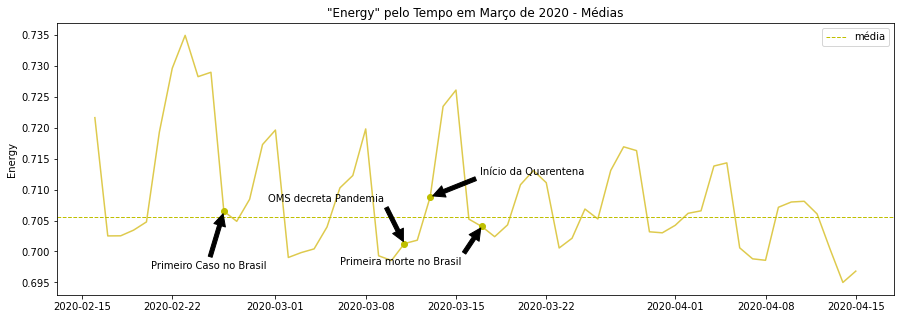

In [13]:
media = np.mean(energy_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:75], energy_medias[15:75], color='#DECA4D')
plt.axhline(media,linewidth=1, color='y', linestyle='--', label='média')

ax.plot(dates[25], energy_medias[25], 'o', color='y')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[25], energy_medias[25]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[39], energy_medias[39], 'o', color='y')
ax.annotate('OMS decreta Pandemia',
            xy=(dates[39], energy_medias[39]), xycoords='data',
            xytext=(-20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[41], energy_medias[41], 'o', color='y')
ax.annotate('Início da Quarentena',
            xy=(dates[41], energy_medias[41]), xycoords='data',
            xytext=(50, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[45], energy_medias[45], 'o', color='y')
ax.annotate('Primeira morte no Brasil',
            xy=(dates[45], energy_medias[45]), xycoords='data',
            xytext=(-20, -30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Energy" pelo Tempo em Março de 2020 - Médias')
plt.legend(loc="upper right")
plt.ylabel('Energy')

Text(0, 0.5, 'Energy')

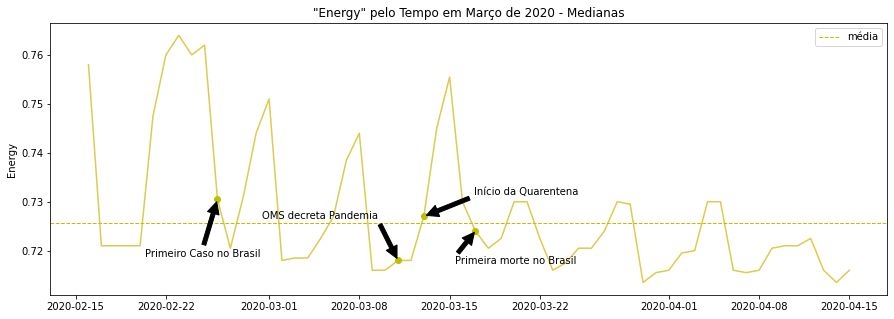

In [16]:
media = np.mean(energy_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:75], energy_median[15:75], color='#DECA4D')
plt.axhline(media,linewidth=1, color='y', linestyle='--', label='média')

ax.plot(dates[25], energy_median[25], 'o', color='y')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[25], energy_median[25]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[39], energy_median[39], 'o', color='y')
ax.annotate('OMS decreta Pandemia',
            xy=(dates[39], energy_median[39]), xycoords='data',
            xytext=(-20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[41], energy_median[41], 'o', color='y')
ax.annotate('Início da Quarentena',
            xy=(dates[41], energy_median[41]), xycoords='data',
            xytext=(50, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[45], energy_median[45], 'o', color='y')
ax.annotate('Primeira morte no Brasil',
            xy=(dates[45], energy_median[45]), xycoords='data',
            xytext=(-20, -30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='center')

plt.title('"Energy" pelo Tempo em Março de 2020 - Medianas')
plt.legend(loc="upper right")
plt.ylabel('Energy')

# Tempo

Text(0, 0.5, 'Tempo')

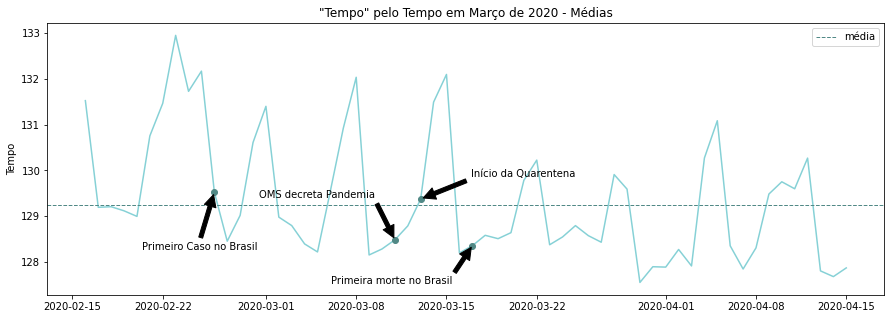

In [19]:
media = np.mean(tempo_medias)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:75], tempo_medias[15:75], color='#86d1d6')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

ax.plot(dates[25], tempo_medias[25], 'o', color='#518986')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[25], tempo_medias[25]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[39], tempo_medias[39], 'o', color='#518986')
ax.annotate('OMS decreta Pandemia',
            xy=(dates[39], tempo_medias[39]), xycoords='data',
            xytext=(-20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[41], tempo_medias[41], 'o', color='#518986')
ax.annotate('Início da Quarentena',
            xy=(dates[41], tempo_medias[41]), xycoords='data',
            xytext=(50, 30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[45], tempo_medias[45], 'o', color='#518986')
ax.annotate('Primeira morte no Brasil',
            xy=(dates[45], tempo_medias[45]), xycoords='data',
            xytext=(-20, -30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Tempo" pelo Tempo em Março de 2020 - Médias')
plt.legend(loc="upper right")
plt.ylabel('Tempo')

Text(0, 0.5, 'Tempo')

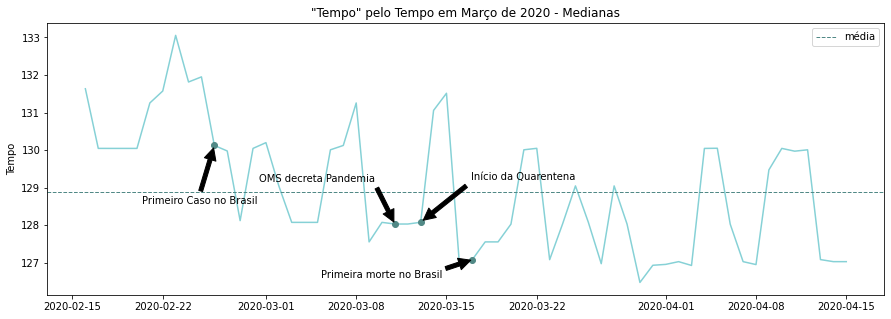

In [24]:
media = np.mean(tempo_median)

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dates[15:75], tempo_median[15:75], color='#86d1d6')
plt.axhline(media,linewidth=1, color='#518986', linestyle='--', label='média')

ax.plot(dates[25], tempo_median[25], 'o', color='#518986')
ax.annotate('Primeiro Caso no Brasil',
            xy=(dates[25], tempo_median[25]), xycoords='data',
            xytext=(-15, -50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

ax.plot(dates[39], tempo_median[39], 'o', color='#518986')
ax.annotate('OMS decreta Pandemia',
            xy=(dates[39], tempo_median[39]), xycoords='data',
            xytext=(-20, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.plot(dates[41], tempo_median[41], 'o', color='#518986')
ax.annotate('Início da Quarentena',
            xy=(dates[41], tempo_median[41]), xycoords='data',
            xytext=(50, 50), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')

ax.plot(dates[45], tempo_median[45], 'o', color='#518986')
ax.annotate('Primeira morte no Brasil',
            xy=(dates[45], tempo_median[45]), xycoords='data',
            xytext=(-30, -10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.title('"Tempo" pelo Tempo em Março de 2020 - Medianas')
plt.legend(loc="upper right")
plt.ylabel('Tempo')